In [1]:
import os
import numpy as np
import random
import tensorflow as tf
import lucid_kietzmannlab.modelzoo.vision_models as models
from ipywidgets import interact, Dropdown, IntSlider
from lucid_kietzmannlab.utils import plot_images
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.compat.v1.disable_eager_execution()


### Select the model seed from codeocean pre-trained models

In [23]:
model_dir="/Users/vkapoor/Downloads/codeocean/models/AlexNet/training_seed_01"
random_seed = 1
model = models.AlexNetCodeOcean(model_dir=model_dir, random_seed = random_seed)


In [24]:
os.environ["PYTHONHASHSEED"] = str(random_seed)
tf.random.set_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

### Some functions needed in the notebook for interactive visualization

In [25]:
layer_shape_dict = model.layer_shape_dict
def visualize(layer_name, channel):
    model.vis_layer = layer_name
    model.channel = channel
    image_channel = model.lucid_visualize_layer()
    
    
def visualize_all(channel_start = 0, channel_end = 10):
    layer_name = current_dropdown_value({'new': layer_dropdown.value})
    model.vis_layer = layer_name
    image_channel = model.lucid_visualize_layer(batch = True, channel_start = channel_start, channel_end = channel_end)
    return image_channel              
        
layer_dropdown = Dropdown(options=list(layer_shape_dict.keys()), description='Layer:')
channel_slider = IntSlider(min=0, max=0, description='Channel:')
def update_channel_slider(change):
    layer_name = change.new
    if layer_name in layer_shape_dict:
        
        max_channel = layer_shape_dict[layer_name][-1] - 1
        channel_slider.max = max_channel
        
def current_slider_value(*args):
    return channel_slider.value

def current_dropdown_value(change):
    return change['new']

channel_slider.observe(current_slider_value, names='value')
layer_dropdown.observe(current_dropdown_value, names='value')
        

       

In [26]:
layer_dropdown.observe(update_channel_slider, names='value')

interact(visualize, layer_name=layer_dropdown, channel=channel_slider)     

interactive(children=(Dropdown(description='Layer:', options=('alexnet_v2/conv1/Conv2D', 'alexnet_v2/conv2/Con…

<function __main__.visualize(layer_name, channel)>

In [27]:
image_channel = visualize_all(channel_start = 72, channel_end = 73)

100%|██████████| 1/1 [00:12<00:00, 12.11s/it]


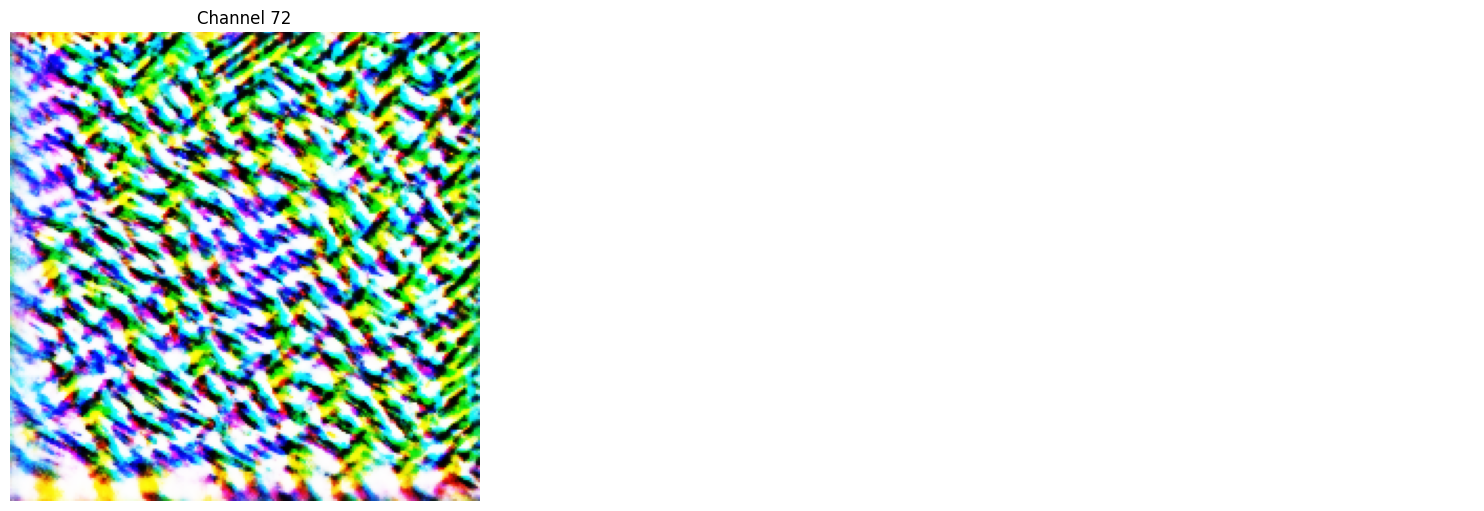

In [13]:

if image_channel:
    plot_images(image_channel)   